length: 6
['#c60d77', '#00a2e8', '#22b14c', '#fff200', '#b97a57', '#000000']


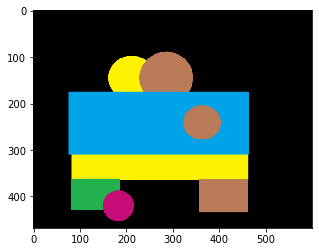

Image mode:  RGB


In [26]:
import cv2
import numpy as np
from PIL import Image,ImageDraw,ImageColor,ImageFont
import matplotlib.pyplot as plt
import matplotlib
import webcolors
import os
#################### Global variables ##########################

file_name='resizedexample'
file_name2="example"
####################################################
def show_image(img):
    plt.imshow(img, interpolation='nearest')
    plt.show()
    img = Image.fromarray(img)
    print("Image mode: ",img.mode)
####################################################

def getTopColorPallete(file_path):
    img=Image.open(file_path)
    colors = img.convert('RGB').getcolors()
    colorlist=[]

    for i in range(len(colors)):
        colorlist.append(webcolors.rgb_to_hex(colors[i][1]))
        
    print("length:",len(colorlist))
    return colorlist
####################################################
file_path ='resized/'+file_name+'.png'
file_path2='sampleImages/'+file_name2+'.png'
cv_img = cv2.imread(file_path)

####################################################
topclr_list=getTopColorPallete(file_path2)
print(topclr_list)
show_image(cv_img)

[198  13 119]


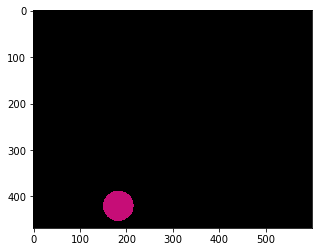

[  0 162 232]


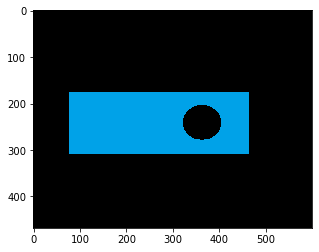

[ 34 177  76]


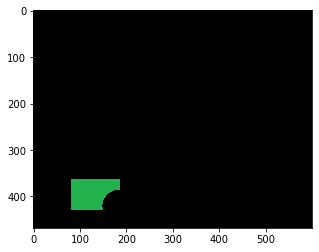

[255 242   0]


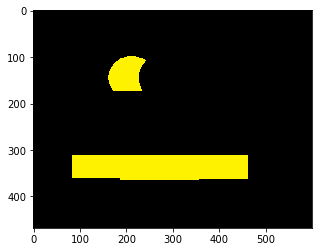

[185 122  87]


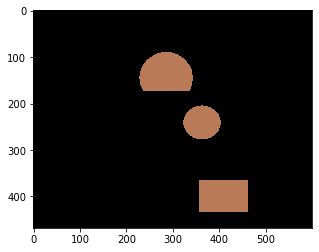

In [27]:
def GetMaskSegment(rgb_image):
    low=[np.array([197, 12, 118]),np.array([0, 161, 231]),np.array([33, 176, 75]),np.array([254, 241, 0]),np.array([184, 121, 86])]
    high=[np.array([198, 13, 119]),np.array([0, 162, 232]),np.array([34, 177, 76]),np.array([255, 242, 0]),np.array([185, 122, 87])]
    imglists=[]
    
    for i in range(len(low)):
        mask = cv2.inRange(rgb_image, low[i], high[i])
        res = cv2.bitwise_and(rgb_image,rgb_image, mask= mask)
        imglists.append([res,high[i]])
        
    return imglists

img_list=GetMaskSegment(cv_img)

for i in range(len(img_list)):
    print(img_list[i][1])
    plt.imshow(img_list[i][0], interpolation='nearest')
    plt.show()

[  0 255]
[  0 255]
[  0 255]
[  0 127 255]
[  0  85 170 255]


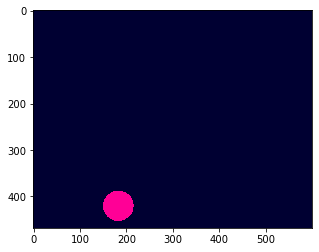

Image mode:  RGB


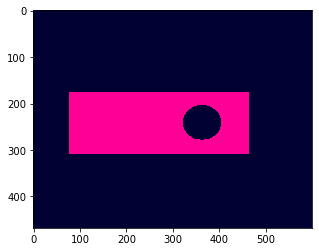

Image mode:  RGB


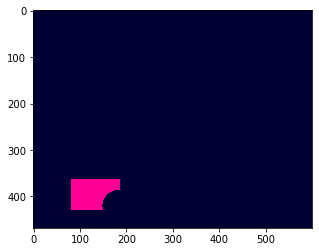

Image mode:  RGB


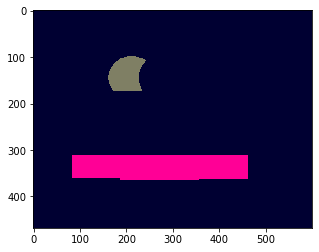

Image mode:  RGB


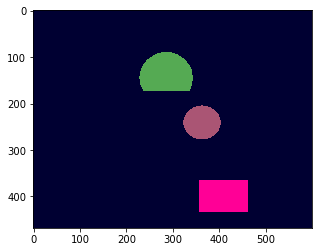

Image mode:  RGB


In [30]:
def apply_lut(src, lut):
    dst = lut[src]
    return dst

def ComponentLabeling(img):
    _, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    n_components, component_ids = cv2.connectedComponents(mask)

    # Initialize look up tables with arbitrary data for demonstration
    LUT1 = np.linspace(0, 255, n_components).astype(np.uint16)
    LUT2 = np.linspace(255, 0, n_components).astype(np.uint16)
    LUT3 = np.linspace(50, 150, n_components).astype(np.uint16)
    LUT2[0] = 0

    print("lut1"LUT1)
    
    r = apply_lut(component_ids, LUT1)
    g = apply_lut(component_ids, LUT2)
    b = apply_lut(component_ids, LUT3)

    rgb = np.dstack((r, g, b)).astype(np.uint8)
    
    return rgb

def RGBtoGrayImage(rgbimg):
    grayImage = cv2.cvtColor(rgbimg, cv2.COLOR_RGB2GRAY)
    (thresh, im_bw) = cv2.threshold(grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return im_bw
    
label_imglist=[]
for i in range(len(img_list)):
    gray_im=RGBtoGrayImage(img_list[i][0])
    label_img=ComponentLabeling(gray_im)
    label_imglist.append(label_img)

for i in range(len(label_imglist)):
    show_image(label_imglist[i])